In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
data=pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
#clearly we donot need lat and long so 
#lets drop it
data.drop(["longitude","latitude"],axis=1,inplace=True)
data.tail()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [36]:
#all value of ocean_proxmity
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [84]:
data.isnull().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

This means there are 207 null values in total_bedrooms column

In [115]:
data['total_bedrooms'].fillna(0,inplace=True)

In [116]:
data['households']
#so it must be null
data.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

This means no null value left

<Figure size 432x288 with 0 Axes>

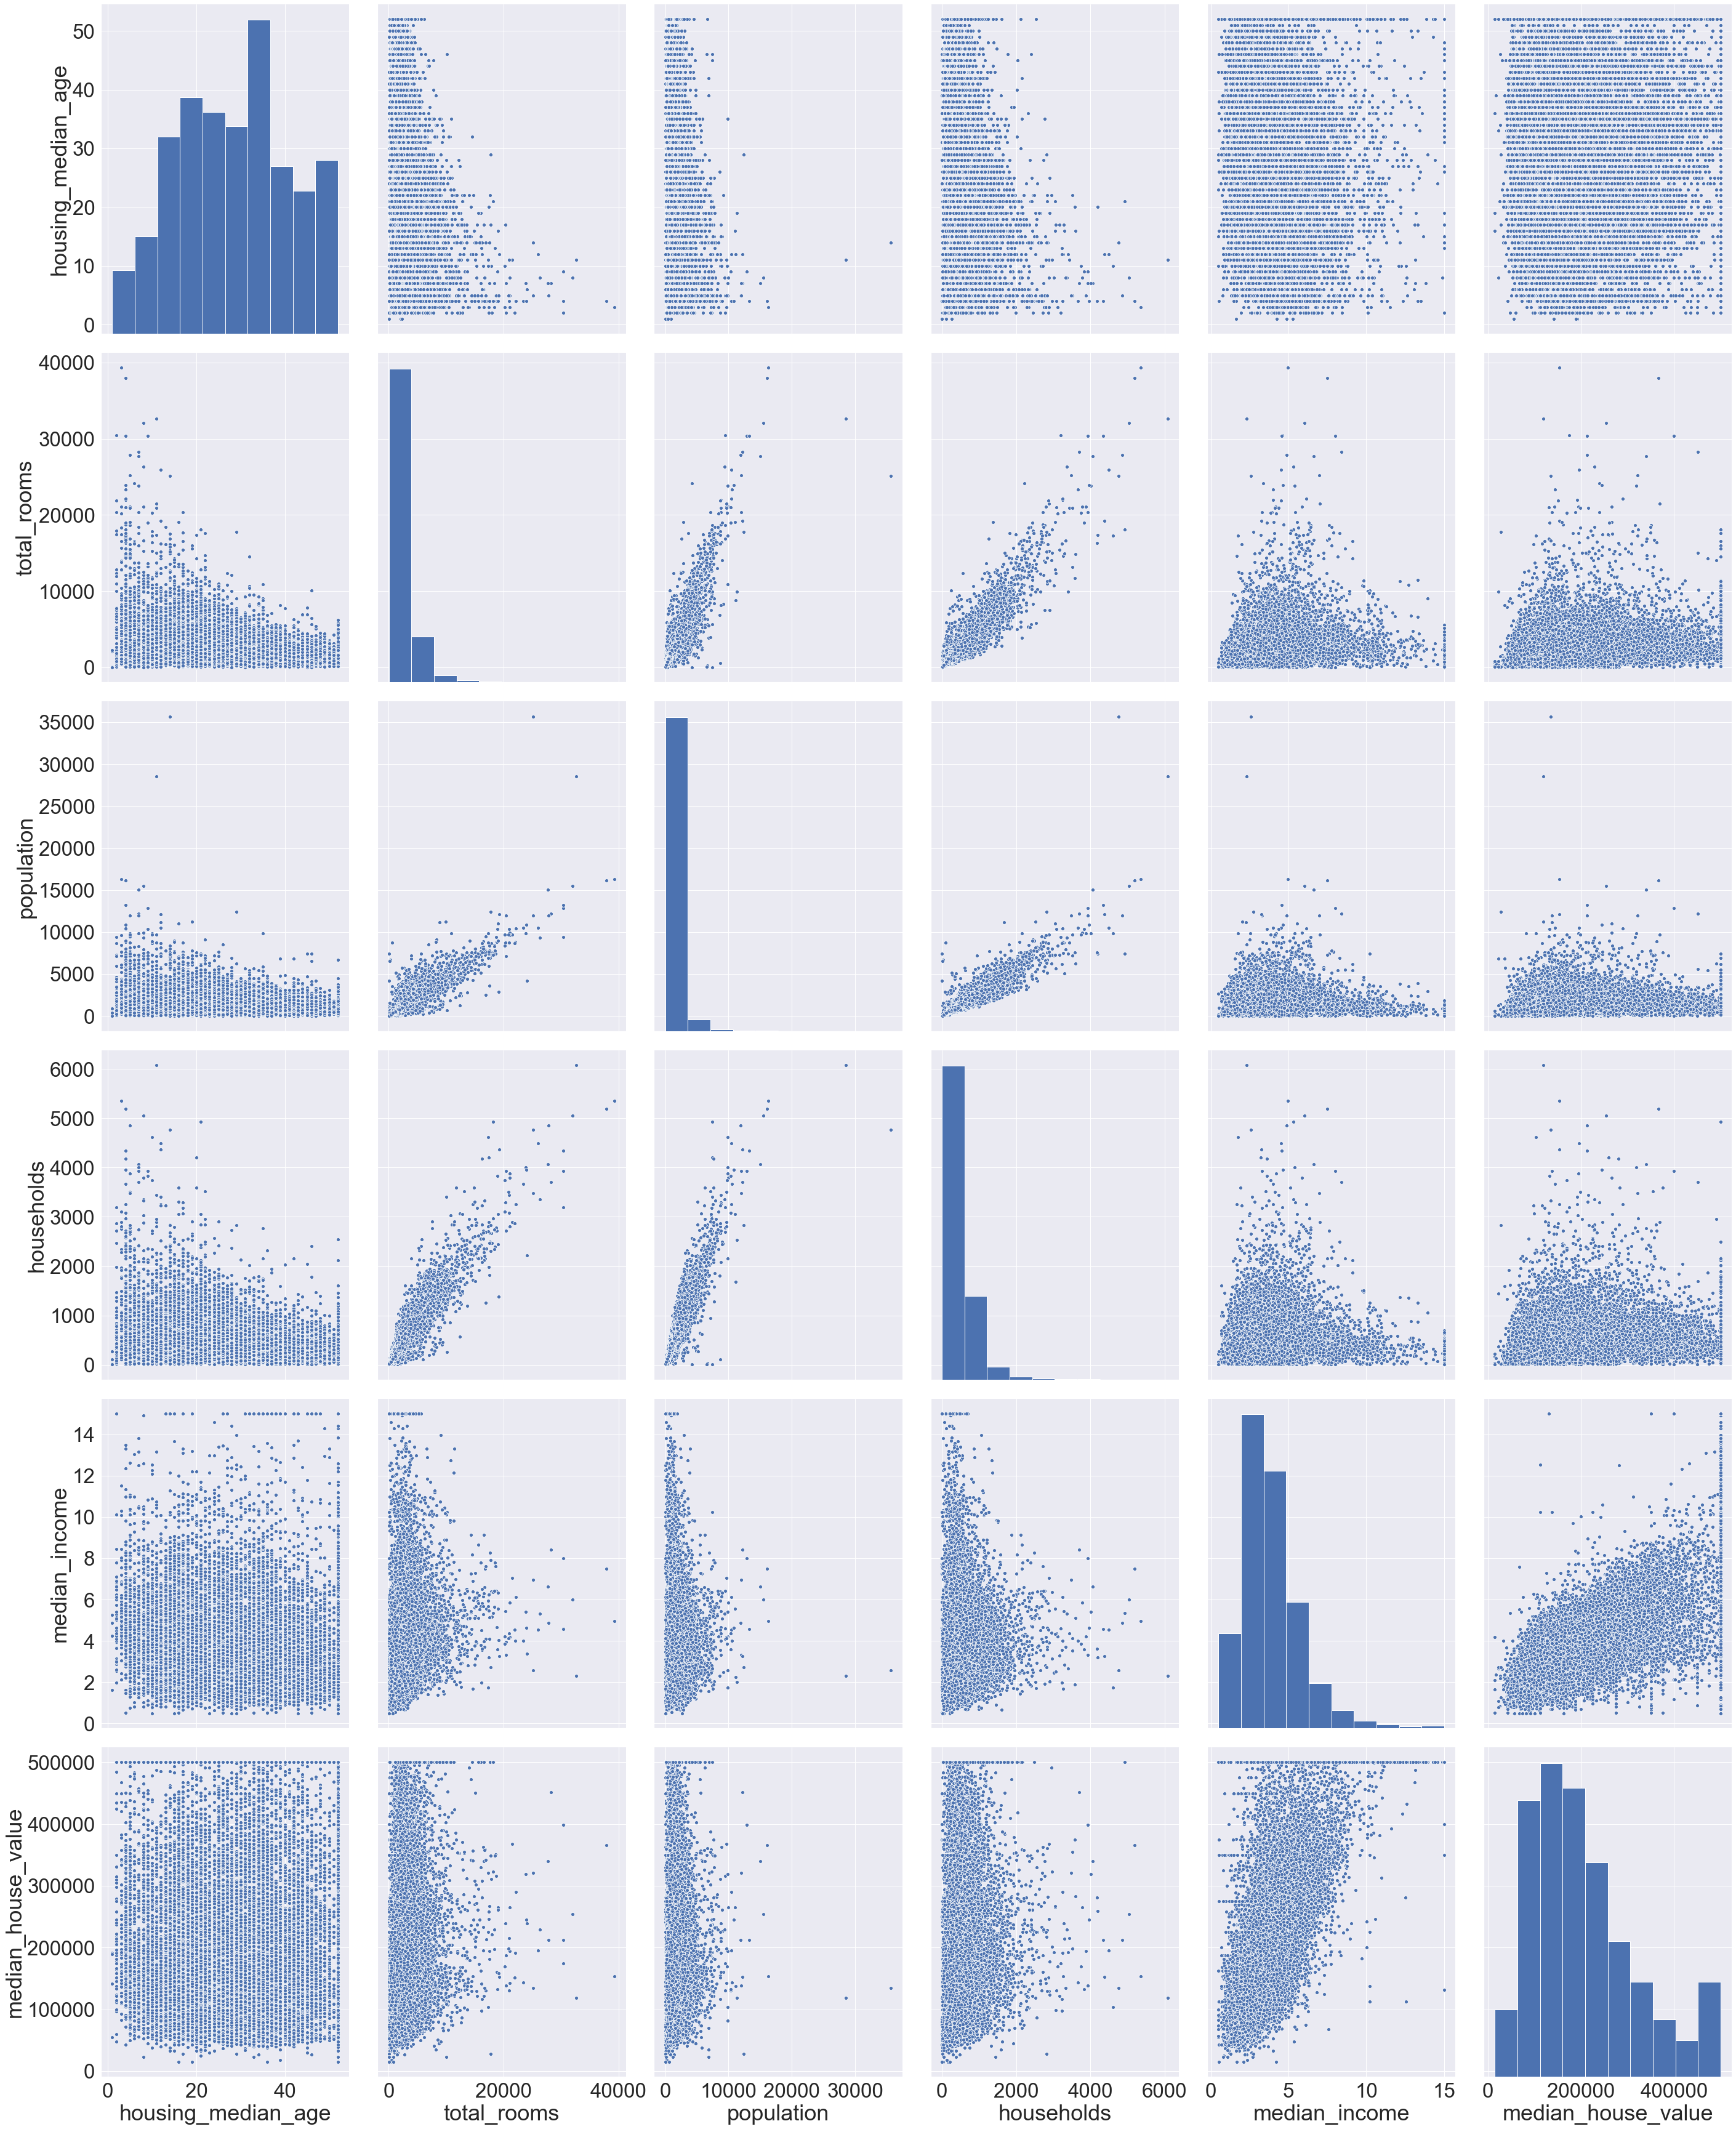

In [117]:
fig=plt.figure()
fig.tight_layout()
sns.set(font_scale=3)
sns.pairplot(data,height=8,aspect=0.8)


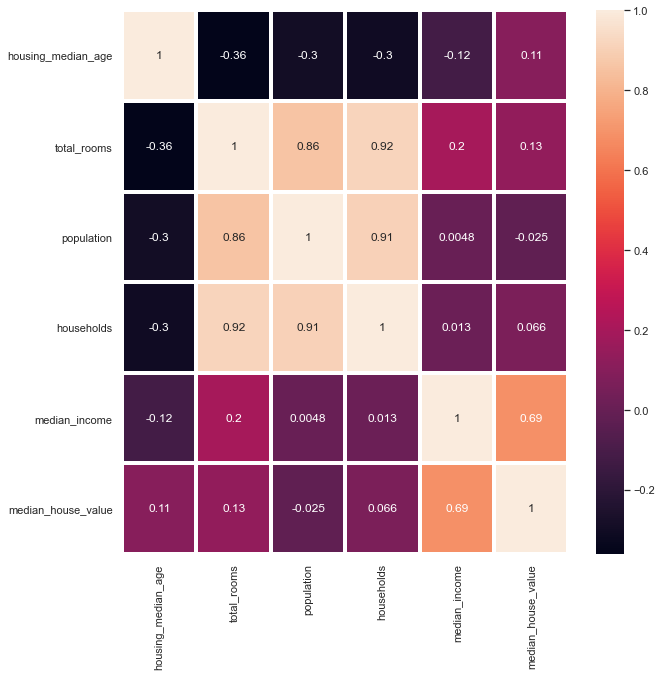

In [123]:
#corelation in data
sns.set(font_scale=1)
dc=data.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(dc,annot=True,ax=ax,linewidths=3)

In [124]:
#just to access the keys
data.tail()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,25.0,1665.0,374,845.0,330.0,1.5603,78100.0,INLAND
20636,18.0,697.0,150,356.0,114.0,2.5568,77100.0,INLAND
20637,17.0,2254.0,485,1007.0,433.0,1.7000,92300.0,INLAND
20638,18.0,1860.0,409,741.0,349.0,1.8672,84700.0,INLAND
20639,16.0,2785.0,616,1387.0,530.0,2.3886,89400.0,INLAND


In [125]:
#let's train the a linear regression model of sklearn
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X=data[['housing_median_age']]
Y=data[['median_house_value']]
lr.fit(X,Y)

LinearRegression()

In [143]:
#lets calculate the preddiction for house of age 33 yrs old
import numpy as np
topred=np.array([33])
topred=topred.reshape(-1,1)

In [144]:
lr.predict(topred)

array([[211078.7547009]])

[[968.44963974]]
[179119.91658938]
mathematical formula is 
Y=968x +179119


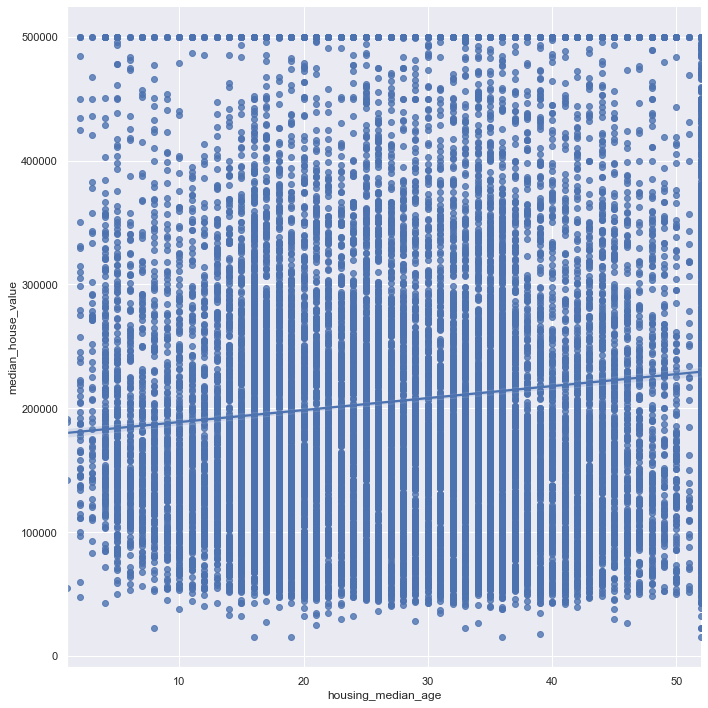

In [157]:
#lets make a mathematical formula
print(lr.coef_)
print(lr.intercept_)
#so mathematical formulation will  be
print("mathematical formula is ")
print("Y="+str(int(lr.coef_))+"x +"+str(int(lr.intercept_)))
sns.lmplot(x="housing_median_age",y="median_house_value",data=data,aspect=1,height=10)

Our model has predicted that 33 unit age house will take around 211078.75 unit currency.<br>
We can make predict next model with <br>
We can make a html form where we can enter 
<ol type='1'>
    <li>housing_median_age	</li>
    <li>total_rooms	</li>
    <li>total_bedrooms</li>	
    <li>population	</li>
    <li>households</li>	
    <li>median_income</li>
</ol>

and our model will predict the of <br>
#### median_house_value
for the house of the info user enters